In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
train.shape

(9557, 143)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [5]:
test = pd.read_csv('test.csv')
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [6]:
test.shape

(23856, 142)

Since test dataset is missing **Target column** , therefore our output variable is **`Target`**.

In [7]:
train['Target'].head()

0    4
1    4
2    4
3    4
4    4
Name: Target, dtype: int64

In [8]:
train.Target.unique()

array([4, 2, 3, 1], dtype=int64)

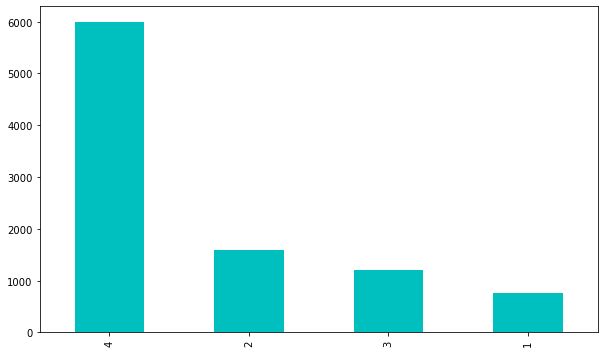

In [9]:
train.Target.value_counts().plot(kind = 'bar', figsize = (10,6), color = 'c');

# Understand the type of data.

In [10]:
print('Integer type columns:')
int_col = train.select_dtypes('int64').columns.to_list()
print(int_col)
print('total integer columns :',len(int_col),'\n\n')
print('Float type columns:')
float_col = train.select_dtypes('float64').columns.to_list()
print(float_col)
print('total float columns :',len(float_col),'\n\n')
print('Object type columns:')
object_col = train.select_dtypes('object').columns.to_list()
print(object_col)
print('total object columns :',len(object_col))


Integer type columns:
['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'escolari', 'hhsize', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 'pare

In [11]:
train.select_dtypes('int64').isnull().sum()

hacdor            0
rooms             0
hacapo            0
v14a              0
refrig            0
                 ..
SQBhogar_total    0
SQBedjefe         0
SQBhogar_nin      0
agesq             0
Target            0
Length: 130, dtype: int64

In [12]:
train.select_dtypes('float64').isnull().sum()

v2a1               6860
v18q1              7342
rez_esc            7928
meaneduc              5
overcrowding          0
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
dtype: int64

In [13]:
train.select_dtypes('float64')

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.00,1.000000,1.000000,0.0000,100.0000
1,135000.0,1.0,NaN,12.00,1.000000,1.000000,64.0000,144.0000
2,NaN,NaN,NaN,11.00,0.500000,0.250000,64.0000,121.0000
3,180000.0,1.0,1.0,11.00,1.333333,1.777778,1.0000,121.0000
4,180000.0,1.0,NaN,11.00,1.333333,1.777778,1.0000,121.0000
...,...,...,...,...,...,...,...,...
9552,80000.0,NaN,NaN,8.25,1.250000,1.562500,0.0625,68.0625
9553,80000.0,NaN,NaN,8.25,1.250000,1.562500,0.0625,68.0625
9554,80000.0,NaN,NaN,8.25,1.250000,1.562500,0.0625,68.0625
9555,80000.0,NaN,NaN,8.25,1.250000,1.562500,0.0625,68.0625


In [14]:
train.select_dtypes('object').isna().sum()

Id            0
idhogar       0
dependency    0
edjefe        0
edjefa        0
dtype: int64

In [15]:
train.select_dtypes('object')

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
...,...,...,...,...,...
9552,ID_d45ae367d,d6c086aa3,.25,9,no
9553,ID_c94744e07,d6c086aa3,.25,9,no
9554,ID_85fc658f8,d6c086aa3,.25,9,no
9555,ID_ced540c61,d6c086aa3,.25,9,no


drop **ID** and **Idhgor** columns.

In [16]:
for df in [train,test]:
    df.drop(['Id','idhogar'], axis = 1, inplace = True)

In [17]:
for df in [train,test]:
    df['dependency'] = df.dependency.apply(lambda x: float(1) if(x== 'yes') else (float(0) if x== 'no' else float(x)))
    df['edjefe'] = df.edjefe.apply(lambda x: float(1) if(x== 'yes') else (float(0) if x== 'no' else float(x)))
    df['edjefa'] = df.edjefa.apply(lambda x: float(1) if(x== 'yes') else (float(0) if x== 'no' else float(x)))

In [18]:
train[['dependency','edjefe','edjefa']].head()

,dependency,edjefe,edjefa
0,0.0,10.0,0.0
1,8.0,12.0,0.0
2,8.0,0.0,11.0
3,1.0,11.0,0.0
4,1.0,11.0,0.0


In [19]:
train.dependency.head()

0    0.0
1    8.0
2    8.0
3    1.0
4    1.0
Name: dependency, dtype: float64

Check `if` there is a house **without** a `family head`.

In [20]:
train.parentesco1.value_counts()

0    6584
1    2973
Name: parentesco1, dtype: int64

edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

In [21]:
pd.crosstab(train['edjefa'],train["edjefe"])

edjefe,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
edjefa,,,,,,,,,,,,,,,,,,,,,
0.0,435,123,194,307,137,222,1845,234,257,486,...,113,103,208,285,134,202,19,14,7,43
1.0,69,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,84,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,152,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,176,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.0,947,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.0,179,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.0,217,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 435 houses have no family head

In [22]:
train[['v18q', 'v18q1']].fillna(0).corr()

,v18q,v18q1
v18q,1.000000,0.849916
v18q1,0.849916,1.000000


v18q = owns a tablet
v18q1 = number of tablets household owns.
When owns a tablet column is 0, there will be no number of tablets household owns.
There is a very high correlation between **v18q** and **v18q1**. So the nan values in **v18q1** can be fill with **0**

In [23]:
for df in [train,test]:
    df.v18q1.fillna(0, inplace = True)

In [24]:
train.v18q1.head()

0    0.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: v18q1, dtype: float64

Columns with **zero variance**. It means that the data values are constant and can be **drop**.

In [25]:
train.var()==0

v2a1               False
hacdor             False
rooms              False
hacapo             False
v14a               False
                   ...  
SQBovercrowding    False
SQBdependency      False
SQBmeaned          False
agesq              False
Target             False
Length: 141, dtype: bool

In [26]:
df = pd.DataFrame(train.var()==0, columns= ['value'])
df.head()

,value
v2a1,False
hacdor,False
rooms,False
hacapo,False
v14a,False


In [27]:
df = df['value'].map({True: 1, False:0}).to_frame()
df.head()

,value
v2a1,0
hacdor,0
rooms,0
hacapo,0
v14a,0


In [28]:
df[df['value']==1]

,value
elimbasu5,1


**elimbasu5** is the only column with **0 variance**. It can be **drop**. 

In [29]:
for df in [train,test]:
    df.drop('elimbasu5',axis =1, inplace = True)

# Adjusting the **nan** values.

    v2a1               6860
    v18q1              7342
    rez_esc            7928
    meaneduc              5
    overcrowding          0
    SQBovercrowding       0
    SQBdependency         0
    SQBmeaned             5

v2a1 is rent column and it cannot be drop. All the nan values of this columns should be replace by 0

In [30]:
for df in [train,test]:
    df['v2a1'].fillna(0, inplace = True)

In [31]:
test.v2a1.isna().sum()

0

rez_esc, Years behind in school

In [32]:
train[train.rez_esc.notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [33]:
train[train.rez_esc.isna()]['age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [34]:
for df in [train,test]:
    df['rez_esc'].fillna(0, inplace = True)

In [35]:
train.isna().sum().sum()

10

In [36]:
for df in [train,test]:
    df['meaneduc'].fillna(np.mean(df['meaneduc']), inplace = True)

 **Set poverty level of the members and the head of the house within a family.**

In [37]:
Poverty_level=train[train['v2a1'] !=0]

In [38]:
poverty_level=Poverty_level.groupby('area1')['v2a1'].apply(np.median)

In [39]:
poverty_level

area1
0     80000.0
1    140000.0
Name: v2a1, dtype: float64

In [40]:
def povert(x):
    if x<8000:
        return('Below poverty level')
    
    elif x>140000:
        return('Above poverty level')
    elif x<140000:
        return('Below poverty level: Urban ; Above poverty level : Rural ')
   

In [41]:
poverty = Poverty_level['v2a1'].apply(povert)

In [42]:
pd.crosstab(poverty,Poverty_level.area1)

area1,0,1
v2a1,,
Above poverty level,139,1103
Below poverty level: Urban ; Above poverty level : Rural,306,1081


Deleting unnessary columns for datasets

In [43]:
test.isna().any()

v2a1               False
hacdor             False
rooms              False
hacapo             False
v14a               False
                   ...  
SQBhogar_nin       False
SQBovercrowding    False
SQBdependency      False
SQBmeaned           True
agesq              False
Length: 139, dtype: bool

**Removing** the unnecessary columns.
        
        SQBescolari, escolari squared
        SQBage, age squared
        SQBhogar_total, hogar_total squared
        SQBedjefe, edjefe squared
        SQBhogar_nin, hogar_nin squared
        SQBovercrowding, overcrowding squared
        SQBdependency, dependency squared
        SQBmeaned, square of the mean years of education of adults (>=18) in the household
        agesq= Age squared

In [44]:
drop_col = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']
for df in [train,test]:
    df.drop(drop_col, axis = 1, inplace = True)

In [45]:
print(train.describe())

               v2a1       hacdor        rooms       hacapo         v14a  \
count  9.557000e+03  9557.000000  9557.000000  9557.000000  9557.000000   
mean   4.662861e+04     0.038087     4.955530     0.023648     0.994768   
std    1.091671e+05     0.191417     1.468381     0.151957     0.072145   
min    0.000000e+00     0.000000     1.000000     0.000000     0.000000   
25%    0.000000e+00     0.000000     4.000000     0.000000     1.000000   
50%    0.000000e+00     0.000000     5.000000     0.000000     1.000000   
75%    4.500000e+04     0.000000     6.000000     0.000000     1.000000   
max    2.353477e+06     1.000000    11.000000     1.000000     1.000000   

            refrig         v18q        v18q1         r4h1         r4h2  ...  \
count  9557.000000  9557.000000  9557.000000  9557.000000  9557.000000  ...   
mean      0.957623     0.231767     0.325416     0.385895     1.559171  ...   
std       0.201459     0.421983     0.697118     0.680779     1.036574  ...   
min     

In [46]:
# train.corr().style.background_gradient(cmap='coolwarm')

In [47]:
print(train.shape)
print('----------')
print(test.shape)

(9557, 131)
----------
(23856, 130)


# Feature Engineering

In [48]:
train.Target.head()

0    4
1    4
2    4
3    4
4    4
Name: Target, dtype: int64

In [49]:
X = train.drop('Target',axis =1)
y = train["Target"]
X.shape, y.shape

((9557, 130), (9557,))

Applying standard scalling to dataset

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
ss = StandardScaler()
X_data = ss.fit_transform(X)

In [52]:
X_data = pd.DataFrame(X_data, columns = X.columns)
X_data.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age
0,1.313389,-0.198986,-1.331829,-0.155629,0.072521,0.210363,-0.549262,-0.466827,-0.566874,-0.539470,...,-1.228106,0.837702,-0.319656,-0.257896,-0.300391,-0.321838,-0.296232,0.632039,-0.632039,0.402406
1,0.809548,-0.198986,-0.650771,-0.155629,0.072521,0.210363,1.820624,0.967727,-0.566874,-0.539470,...,-1.228106,0.837702,-0.319656,-0.257896,-0.300391,-0.321838,-0.296232,0.632039,-0.632039,1.512945
2,-0.427153,-0.198986,2.073460,-0.155629,0.072521,0.210363,-0.549262,-0.466827,-0.566874,-1.504237,...,-1.902337,0.837702,-0.319656,-0.257896,-0.300391,-0.321838,-0.296232,0.632039,-0.632039,2.669756
3,1.221781,-0.198986,0.030287,-0.155629,0.072521,0.210363,1.820624,0.967727,-0.566874,0.425297,...,0.120356,0.837702,-0.319656,-0.257896,-0.300391,-0.321838,-0.296232,0.632039,-0.632039,-0.800678
4,1.221781,-0.198986,0.030287,-0.155629,0.072521,0.210363,1.820624,0.967727,-0.566874,0.425297,...,0.120356,0.837702,-0.319656,-0.257896,-0.300391,-0.321838,-0.296232,0.632039,-0.632039,0.124771


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
x_train,x_test,y_train,y_test = train_test_split(X_data, y, test_size = 0.2, random_state=42)

In [54]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [55]:
y_pred = RFC.predict(x_test)
print("confusion matrix :\n",confusion_matrix(y_test,y_pred))
print("\n\nclassification report :\n",classification_report(y_test,y_pred))
print("\n\naccuracy score :\n",accuracy_score(y_test,y_pred))

confusion matrix :
 [[ 140    8    0   16]
 [   2  272    5   32]
 [   0    8  197   49]
 [   0    5    2 1176]]


classification report :
               precision    recall  f1-score   support

           1       0.99      0.85      0.92       164
           2       0.93      0.87      0.90       311
           3       0.97      0.78      0.86       254
           4       0.92      0.99      0.96      1183

    accuracy                           0.93      1912
   macro avg       0.95      0.87      0.91      1912
weighted avg       0.94      0.93      0.93      1912



accuracy score :
 0.9335774058577406


In [56]:
acc = pd.DataFrame(data = {"actual values":y_test,"Predicted values":y_pred})
acc.head()

,actual values,Predicted values
8503,2,4
7752,1,1
9350,1,1
8414,3,3
7671,2,2


In [57]:
import matplotlib.pyplot as plt

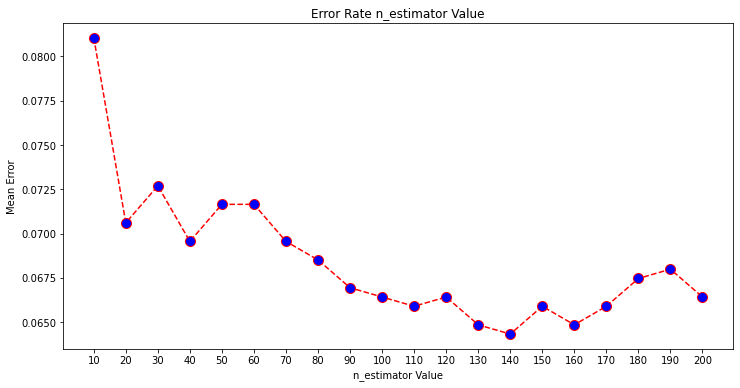

In [58]:
error = []   

for i in range(10, 201, 10):  
    classifier = RandomForestClassifier(n_estimators = i, random_state = 100)
    classifier.fit(x_train, y_train)
    pred_i = classifier.predict(x_test)
    error.append(np.mean(pred_i != y_test))   
  

plt.figure(figsize=(12, 6))  
plt.plot(range(10, 201, 10), error, color='red', 
         linestyle='dashed', marker='o', markerfacecolor='blue', 
         markersize=10)
plt.xticks(np.arange(10, 201, step=10))
plt.title('Error Rate n_estimator Value')  
plt.xlabel('n_estimator Value')  
plt.ylabel('Mean Error');

In [59]:
RFC = RandomForestClassifier(n_estimators=140,random_state = 42)

RFC.fit(x_train, y_train)

y_pred = RFC.predict(x_test)
print("confusion matrix :\n",confusion_matrix(y_test,y_pred))
print("\n\nclassification report :\n",classification_report(y_test,y_pred))
print("\n\naccuracy score :\n",accuracy_score(y_test,y_pred))

confusion matrix :
 [[ 140    8    0   16]
 [   4  272    4   31]
 [   0    6  200   48]
 [   0    6    3 1174]]


classification report :
               precision    recall  f1-score   support

           1       0.97      0.85      0.91       164
           2       0.93      0.87      0.90       311
           3       0.97      0.79      0.87       254
           4       0.93      0.99      0.96      1183

    accuracy                           0.93      1912
   macro avg       0.95      0.88      0.91      1912
weighted avg       0.94      0.93      0.93      1912



accuracy score :
 0.9341004184100419


In [60]:
acc = pd.DataFrame(data = {"actual values":y_test,"Predicted values":y_pred})
acc.head()

,actual values,Predicted values
8503,2,1
7752,1,1
9350,1,1
8414,3,3
7671,2,2


# Random forest by cross validation method 

In [61]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.decomposition import PCA
X_train,X_test,y_train,y_test = train_test_split(X_data, y, test_size = 0.2, random_state=42)

X_train = ss.fit_transform(X_train)  
X_test = ss.transform(X_test)

pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)
RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)

kfold=KFold(n_splits=30,random_state=7,shuffle=True)

print("confusion matrix :\n",confusion_matrix(y_test,y_pred))
print("\n\nclassification report :\n",classification_report(y_test,y_pred))
print("\n\naccuracy score : ",accuracy_score(y_test,y_pred))

# print(cross_val_score(RFC,X_data,y,cv=kfold,scoring='accuracy'))
results=cross_val_score(RFC,X_data,y,cv=kfold,scoring='accuracy')
print("Accuracy after cross validation :")
print(results.mean()*100)

confusion matrix :
 [[  66   20    0   78]
 [   0  147    2  162]
 [   0   10   71  173]
 [   0    7    0 1176]]


classification report :
               precision    recall  f1-score   support

           1       1.00      0.40      0.57       164
           2       0.80      0.47      0.59       311
           3       0.97      0.28      0.43       254
           4       0.74      0.99      0.85      1183

    accuracy                           0.76      1912
   macro avg       0.88      0.54      0.61      1912
weighted avg       0.80      0.76      0.73      1912



accuracy score :  0.7635983263598326
Accuracy after cross validation :
94.79922845895523


In [62]:
acc = pd.DataFrame(data = {"actual values":y_test,"Predicted values":y_pred})
acc.head()

,actual values,Predicted values
8503,2,4
7752,1,1
9350,1,1
8414,3,4
7671,2,2
